In [1]:
import pandas as pd

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
polity_master = pd.read_csv('polity_master.csv')

In [98]:
polity_master.columns 

Index(['Unnamed: 0', 'country', 'year', 'v2x_polyarchy', 'v2x_liberal',
       'v2x_partipdem', 'v2x_egaldem', 'v2x_frassoc_thick', 'v2x_freexp',
       'v2xme_altinf', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecoff',
       'e_v2x_gender_5C', 'v2xcl_rol', 'v2x_jucon', 'v2x_cspart',
       'v2xeg_eqprotec', 'v2xeg_eqdr', 'v2xcs_ccsi', 'v2x_gender', 'v2x_gencl',
       'v2x_elecreg', 'v2xel_elecpres', 'v2x_corr', 'v2x_civlib', 'v2elrstrct',
       'v2elcomvot', 'v2elrsthos', 'v2psparban_ord', 'v2psbars_ord',
       'v2ex_elechos', 'v2clacfree_ord', 'v2clrelig_ord', 'v2cltort_ord',
       'v2clkill_ord', 'v2cltrnslw_ord', 'v2clfmove_ord', 'v2cldiscw_ord',
       'v2clstown_ord', 'v2xcl_acjst', 'v2clacjust_ord', 'v2svinlaut_ord',
       'v2csreprss_ord', 'v2csrlgrep_ord', 'v2mecenefm_ord', 'v2mecenefi_ord',
       'v2mebias_ord', 'v2mecorrpt_ord', 'v2pepwrses_ord', 'v2pepwrgen_ord',
       'v2peedueq_ord', 'v2pehealth_ord', 'e_v2x_regime', 'e_fh_cl',
       'e_fh_pair', 'e_regionpol', 'e_regi

# Data Visualization

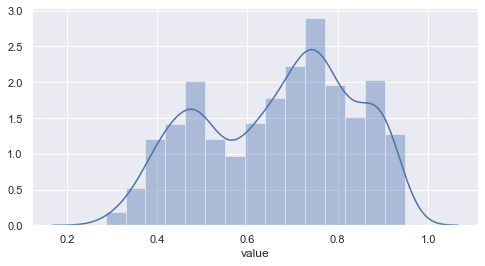

In [102]:
sns.distplot(polity_master['value'])

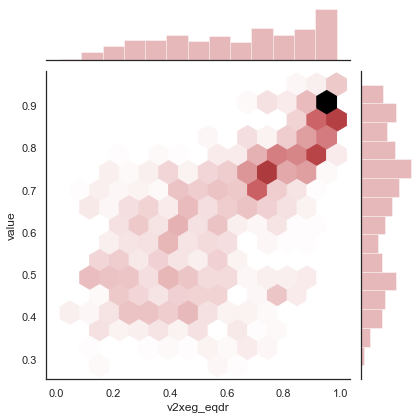

In [103]:
with sns.axes_style('white'):
    sns.jointplot("v2xeg_eqdr", "value", polity_master, kind='hex', color='r');

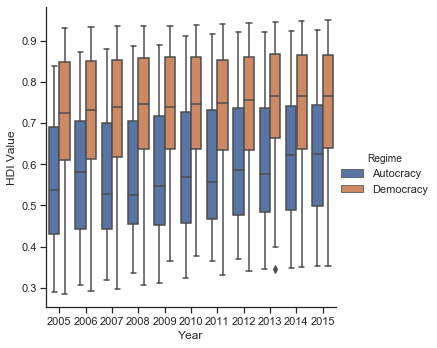

In [108]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("year", "value", "Regime", data=polity_master, kind="box")
    g.set_axis_labels("Year", "HDI Value");

## Multi Variate Analysis

### 1. Civil Society Index vs HDI value

#### Scatter Plots between two variables

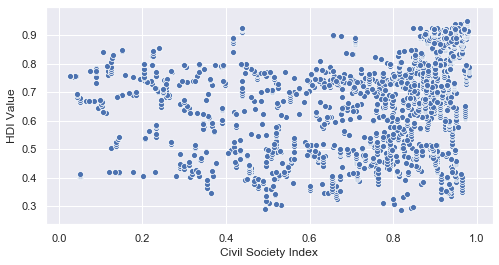

In [109]:
ax = sns.scatterplot(x='v2xcs_ccsi', y='value', data=polity_master)
ax.set(xlabel='Civil Society Index', ylabel='HDI Value')
sns.set(rc={'figure.figsize':(8,5)})
plt.show()

#### Scatter Plot and Desity Plot

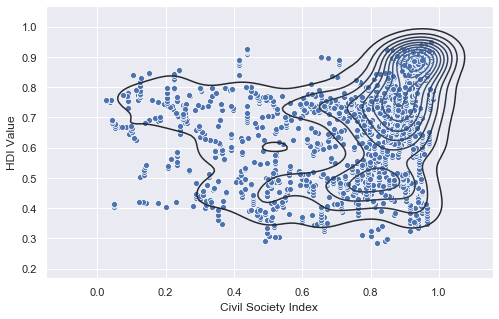

In [13]:
sns.scatterplot(x='v2xcs_ccsi', y='value', data=polity_master)
sns.kdeplot(polity_master.v2xcs_ccsi, polity_master.value)
sns.set(rc={'figure.figsize':(8,5)})
plt.xlabel('Civil Society Index')
plt.ylabel('HDI Value')
plt.show()

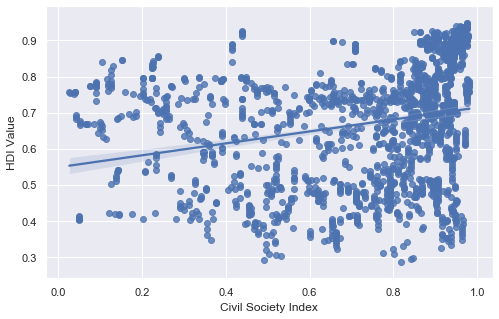

In [113]:
sns.regplot(x='v2xcs_ccsi', y='value', data=polity_master, color='b')
sns.set(rc={'figure.figsize':(8,5)})
plt.xlabel('Civil Society Index')
plt.ylabel('HDI Value')
plt.show()

In [20]:
from scipy.stats import pearsonr

corr, _ = pearsonr(polity_master['v2xcs_ccsi'], polity_master['value'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.246


In [114]:
polity_master.loc[polity_master['e_v2x_regime'] == 0, 'e_v2x_regime'] = 'Closed Autocracy'
polity_master.loc[polity_master['e_v2x_regime'] == 1, 'e_v2x_regime'] = 'Electoral Autocracy'
polity_master.loc[polity_master['e_v2x_regime'] == 2, 'e_v2x_regime'] = 'Electoral Democracy'
polity_master.loc[polity_master['e_v2x_regime'] == 3, 'e_v2x_regime'] = 'Liberal Democracy'

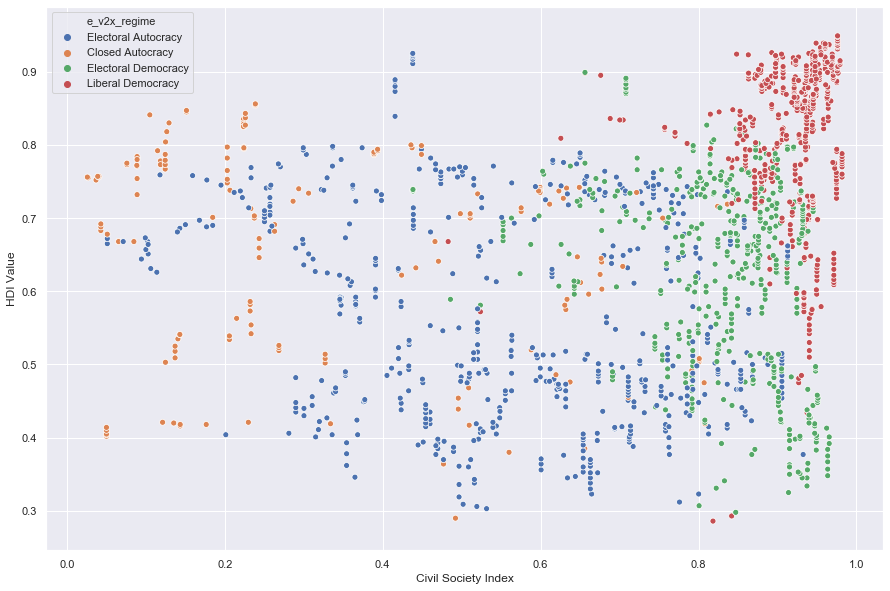

In [37]:
sns.scatterplot(x='v2xcs_ccsi', y='value', hue='e_v2x_regime', data=polity_master)
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel('Civil Society Index')
plt.ylabel('HDI Value')
plt.show()

#### Know the Important Variables

`v2x_freexp` - Freedom of Speech Index

`v2xcl_rol` - Equality before law

`v2xel_frefair`  - Clean Elections Index

`v2x_corr` - Political Corruption Index

`value` - HDI value

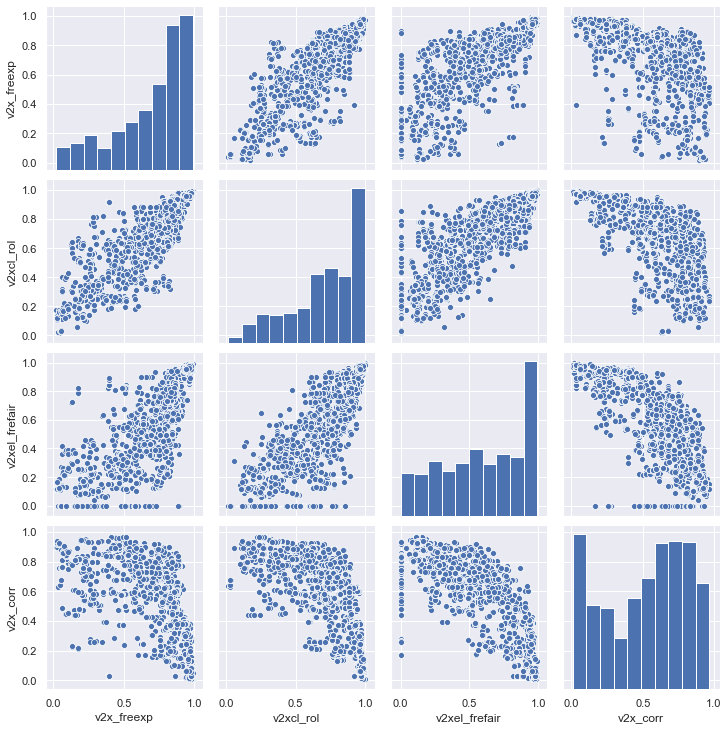

In [61]:
df = polity_master[['v2x_freexp', 'v2xcl_rol', 'v2xel_frefair', 'v2x_corr']]
cols = ['v2x_freexp', 'v2xcl_rol', 'v2xel_frefair', 'v2x_corr']
sns.pairplot(df, vars=cols)

In [107]:
polity_master['Regime'] = ''
polity_master.loc[polity_master['e_v2x_regime'] == 'Closed Autocracy', 'Regime'] = 'Autocracy'
polity_master.loc[polity_master['e_v2x_regime'] == 'Electoral Autocracy', 'Regime'] = 'Autocracy'
polity_master.loc[polity_master['e_v2x_regime'] == 'Electoral Democracy', 'Regime'] = 'Democracy'
polity_master.loc[polity_master['e_v2x_regime'] == 'Liberal Democracy', 'Regime'] = 'Democracy'

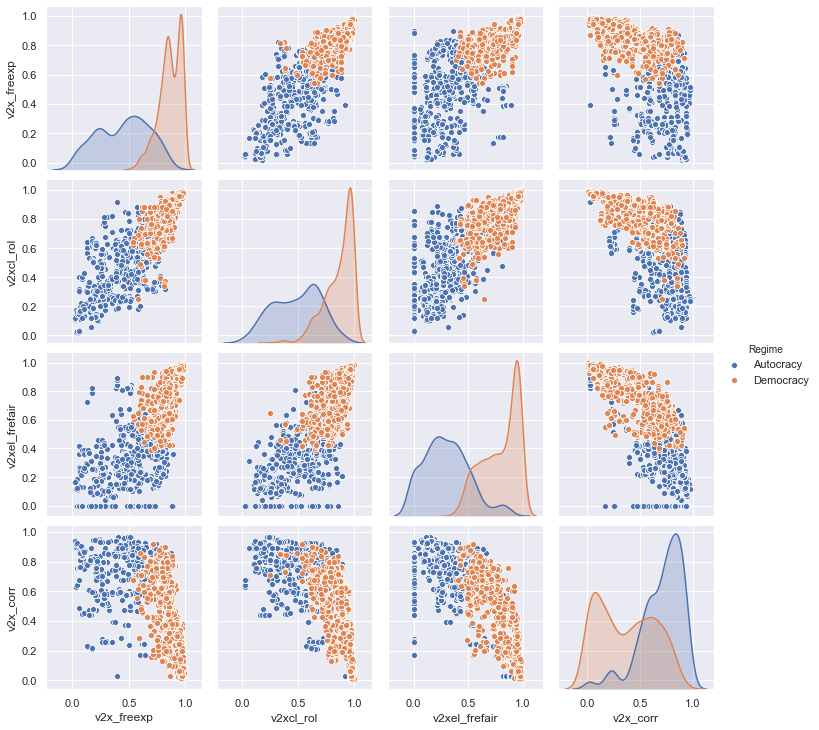

In [60]:
df = polity_master[['v2x_freexp', 'v2xcl_rol', 'v2xel_frefair', 'v2x_corr','Regime']]
cols = ['v2x_freexp', 'v2xcl_rol', 'v2xel_frefair', 'v2x_corr']
sns.pairplot(df, vars=cols, hue='Regime')

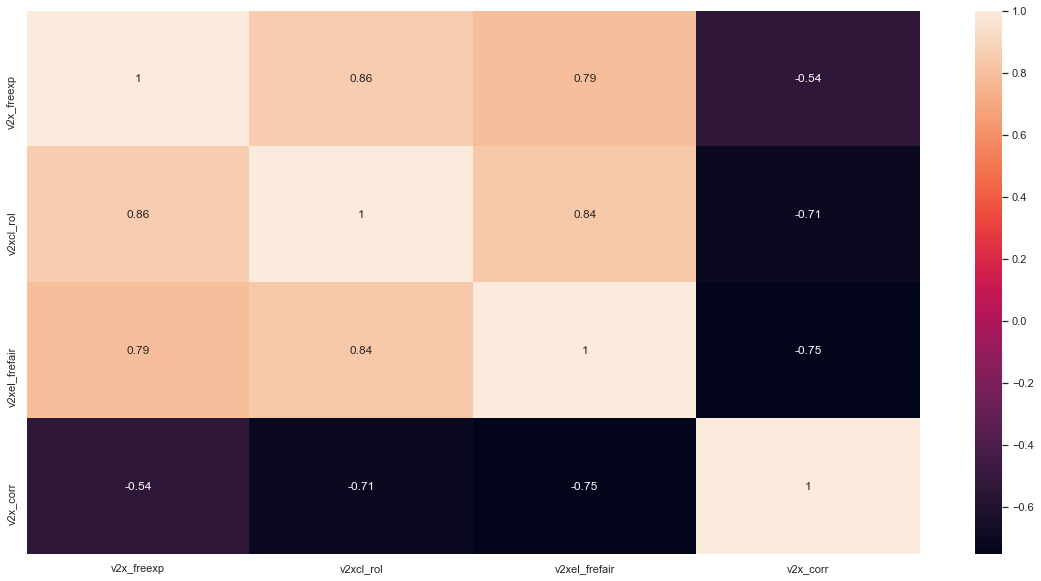

In [81]:
sns.heatmap(df.corr(), annot=True)
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

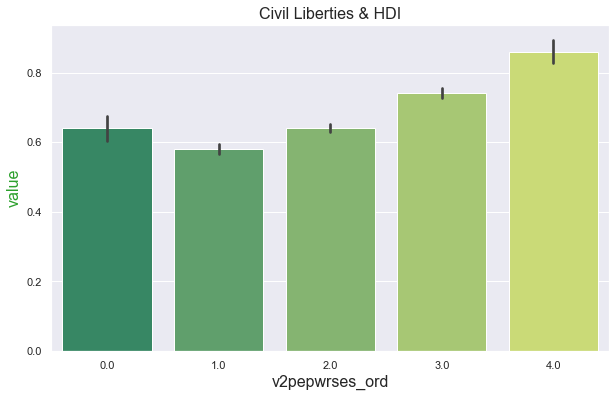

In [96]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Power Distributed by Socio Economic Index & HDI', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 = sns.barplot(x='v2pepwrses_ord', y='value', data = polity_master, palette='summer')
ax1.tick_params(axis='y')
plt.show()